In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os, sys
plt.style.use('ggplot')

c:\users\natea\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv('data_set_ALL_AML_train.csv')
test_data = pd.read_csv('data_set_ALL_AML_independent.csv')
labels = pd.read_csv('actual.csv')

In [3]:
train_data.shape

(7129, 78)

In [4]:
test_data.shape

(7129, 70)

In [5]:
train_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [7]:
probe_list = list(test_data['Gene Accession Number'])

In [8]:
#merge train and test dataframes

In [9]:
all_data = pd.concat([train_data, test_data],axis=1)

In [10]:
all_data.shape

(7129, 148)

In [11]:
all_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [12]:
# we can drop 'Gene Accession' and the 'call' columns

In [13]:
cols_to_drop = [col for col in train_data.columns if 'call' in col]
cols_to_drop.append('Gene Description')

In [14]:
all_data.drop(columns=cols_to_drop, inplace=True)

In [15]:
all_data.set_index('Gene Accession Number',inplace=True)

In [16]:
all_data = all_data.T

In [17]:
all_data.head()

Gene Accession Number,"(AFFX-BioB-5_at, AFFX-BioB-5_at)","(AFFX-BioB-M_at, AFFX-BioB-M_at)","(AFFX-BioB-3_at, AFFX-BioB-3_at)","(AFFX-BioC-5_at, AFFX-BioC-5_at)","(AFFX-BioC-3_at, AFFX-BioC-3_at)","(AFFX-BioDn-5_at, AFFX-BioDn-5_at)","(AFFX-BioDn-3_at, AFFX-BioDn-3_at)","(AFFX-CreX-5_at, AFFX-CreX-5_at)","(AFFX-CreX-3_at, AFFX-CreX-3_at)","(AFFX-BioB-5_st, AFFX-BioB-5_st)",...,"(U48730_at, U48730_at)","(U58516_at, U58516_at)","(U73738_at, U73738_at)","(X06956_at, X06956_at)","(X16699_at, X16699_at)","(X83863_at, X83863_at)","(Z17240_at, Z17240_at)","(L49218_f_at, L49218_f_at)","(M71243_f_at, M71243_f_at)","(Z78285_f_at, Z78285_f_at)"
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [18]:
all_data = all_data.where(all_data >= 20, 20)

In [19]:
all_data.head()

Gene Accession Number,"(AFFX-BioB-5_at, AFFX-BioB-5_at)","(AFFX-BioB-M_at, AFFX-BioB-M_at)","(AFFX-BioB-3_at, AFFX-BioB-3_at)","(AFFX-BioC-5_at, AFFX-BioC-5_at)","(AFFX-BioC-3_at, AFFX-BioC-3_at)","(AFFX-BioDn-5_at, AFFX-BioDn-5_at)","(AFFX-BioDn-3_at, AFFX-BioDn-3_at)","(AFFX-CreX-5_at, AFFX-CreX-5_at)","(AFFX-CreX-3_at, AFFX-CreX-3_at)","(AFFX-BioB-5_st, AFFX-BioB-5_st)",...,"(U48730_at, U48730_at)","(U58516_at, U58516_at)","(U73738_at, U73738_at)","(X06956_at, X06956_at)","(X16699_at, X16699_at)","(X83863_at, X83863_at)","(Z17240_at, Z17240_at)","(L49218_f_at, L49218_f_at)","(M71243_f_at, M71243_f_at)","(Z78285_f_at, Z78285_f_at)"
1,20,20,20,88,20,20,199,20,252,206,...,185,511,20,389,20,793,329,36,191,20
2,20,20,20,283,20,20,20,20,101,74,...,169,837,20,442,20,782,295,20,76,20
3,20,20,20,309,20,20,33,20,206,20,...,315,1199,33,168,52,1138,777,41,228,20
4,20,20,265,20,20,20,158,20,49,31,...,240,835,218,174,20,627,170,20,126,20
5,20,20,20,168,20,20,20,20,70,252,...,156,649,57,504,20,250,314,20,56,20


In [20]:
all_data.columns = probe_list

In [21]:
all_data.reset_index(inplace=True)

In [22]:
all_data.head()

,index,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,1,20,20,20,88,20,20,199,20,252,...,185,511,20,389,20,793,329,36,191,20
1,2,20,20,20,283,20,20,20,20,101,...,169,837,20,442,20,782,295,20,76,20
2,3,20,20,20,309,20,20,33,20,206,...,315,1199,33,168,52,1138,777,41,228,20
3,4,20,20,265,20,20,20,158,20,49,...,240,835,218,174,20,627,170,20,126,20
4,5,20,20,20,168,20,20,20,20,70,...,156,649,57,504,20,250,314,20,56,20


In [23]:
all_data.shape

(72, 7130)

In [24]:
all_data.rename(columns={'index':'patient'},inplace=True)

In [25]:
all_data.head(10)

,patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,1,20,20,20,88,20,20,199,20,252,...,185,511,20,389,20,793,329,36,191,20
1,2,20,20,20,283,20,20,20,20,101,...,169,837,20,442,20,782,295,20,76,20
2,3,20,20,20,309,20,20,33,20,206,...,315,1199,33,168,52,1138,777,41,228,20
3,4,20,20,265,20,20,20,158,20,49,...,240,835,218,174,20,627,170,20,126,20
4,5,20,20,20,168,20,20,20,20,70,...,156,649,57,504,20,250,314,20,56,20
5,6,20,20,215,71,20,20,67,20,87,...,115,1221,20,172,20,645,341,26,193,20
6,7,20,20,238,55,20,20,131,20,126,...,30,819,20,151,20,1140,482,20,369,20
7,8,20,20,20,20,20,20,20,20,70,...,289,629,20,302,23,1799,446,59,781,20
8,9,20,20,106,268,20,20,20,20,24,...,356,980,20,177,20,758,385,115,244,20
9,10,20,20,42,219,20,20,328,20,177,...,42,986,26,101,21,570,359,20,171,20


In [26]:
labels.patient = pd.to_numeric(labels.patient)

In [27]:
labels.dtypes

patient     int64
cancer     object
dtype: object

In [28]:
all_data.patient = pd.to_numeric(all_data.patient)

In [29]:
all_data.patient.dtype

dtype('int64')

In [30]:
data = pd.merge(all_data, labels,on='patient') 

In [31]:
data.head()

,patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
0,1,20,20,20,88,20,20,199,20,252,...,511,20,389,20,793,329,36,191,20,ALL
1,2,20,20,20,283,20,20,20,20,101,...,837,20,442,20,782,295,20,76,20,ALL
2,3,20,20,20,309,20,20,33,20,206,...,1199,33,168,52,1138,777,41,228,20,ALL
3,4,20,20,265,20,20,20,158,20,49,...,835,218,174,20,627,170,20,126,20,ALL
4,5,20,20,20,168,20,20,20,20,70,...,649,57,504,20,250,314,20,56,20,ALL


In [32]:
data.dtypes

patient            int64
AFFX-BioB-5_at     int64
AFFX-BioB-M_at     int64
AFFX-BioB-3_at     int64
AFFX-BioC-5_at     int64
                   ...  
Z17240_at          int64
L49218_f_at        int64
M71243_f_at        int64
Z78285_f_at        int64
cancer            object
Length: 7131, dtype: object

In [33]:
data.set_index('patient', inplace=True)

In [34]:
data.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
patient,,,,,,,,,,,,,,,,,,,,,
1,20,20,20,88,20,20,199,20,252,206,...,511,20,389,20,793,329,36,191,20,ALL
2,20,20,20,283,20,20,20,20,101,74,...,837,20,442,20,782,295,20,76,20,ALL
3,20,20,20,309,20,20,33,20,206,20,...,1199,33,168,52,1138,777,41,228,20,ALL
4,20,20,265,20,20,20,158,20,49,31,...,835,218,174,20,627,170,20,126,20,ALL
5,20,20,20,168,20,20,20,20,70,252,...,649,57,504,20,250,314,20,56,20,ALL


In [35]:
nunique = data.apply(pd.Series.nunique)

In [36]:
drop_cols = nunique[nunique == 1].index

In [37]:
data.drop(columns=drop_cols, inplace=True)

In [38]:
data.head()

,AFFX-BioB-5_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-3_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
patient,,,,,,,,,,,,,,,,,,,,,
1,20,20,88,20,199,252,206,20,20,75,...,511,20,389,20,793,329,36,191,20,ALL
2,20,20,283,20,20,101,74,20,20,182,...,837,20,442,20,782,295,20,76,20,ALL
3,20,20,309,20,33,206,20,20,20,208,...,1199,33,168,52,1138,777,41,228,20,ALL
4,20,265,20,20,158,49,31,363,20,142,...,835,218,174,20,627,170,20,126,20,ALL
5,20,20,168,20,20,70,252,155,20,32,...,649,57,504,20,250,314,20,56,20,ALL


In [39]:
data.shape

(72, 6834)

In [40]:
data.isnull().sum().sum()

0

In [41]:
data.cancer.value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

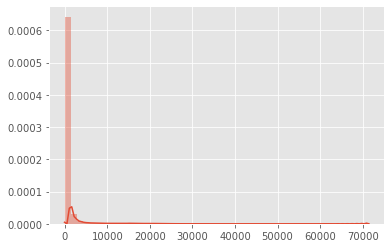

In [42]:
sns.distplot(data.drop(columns='cancer').stack())

In [43]:
data.drop(columns='cancer').stack().max()

71369

In [44]:
data.drop(columns='cancer').stack().min()

20

In [45]:
#we will log transform the data before going on

In [46]:
log_data = data.drop(columns='cancer').apply(np.log2)

In [47]:
log_data['cancer'] = data.cancer

In [48]:
log_data.head()

,AFFX-BioB-5_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-3_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
patient,,,,,,,,,,,,,,,,,,,,,
1,4.321928,4.321928,6.459432,4.321928,7.636625,7.977280,7.686501,4.321928,4.321928,6.228819,...,8.997179,4.321928,8.603626,4.321928,9.631177,8.361944,5.169925,7.577429,4.321928,ALL
2,4.321928,4.321928,8.144658,4.321928,4.321928,6.658211,6.209453,4.321928,4.321928,7.507795,...,9.709084,4.321928,8.787903,4.321928,9.611025,8.204571,4.321928,6.247928,4.321928,ALL
3,4.321928,4.321928,8.271463,4.321928,5.044394,7.686501,4.321928,4.321928,4.321928,7.700440,...,10.227616,5.044394,7.392317,5.700440,10.152285,9.601771,5.357552,7.832890,4.321928,ALL
4,4.321928,8.049849,4.321928,4.321928,7.303781,5.614710,4.954196,8.503826,4.321928,7.149747,...,9.705632,7.768184,7.442943,4.321928,9.292322,7.409391,4.321928,6.977280,4.321928,ALL
5,4.321928,4.321928,7.392317,4.321928,4.321928,6.129283,7.977280,7.276124,4.321928,5.000000,...,9.342075,5.832890,8.977280,4.321928,7.965784,8.294621,4.321928,5.807355,4.321928,ALL


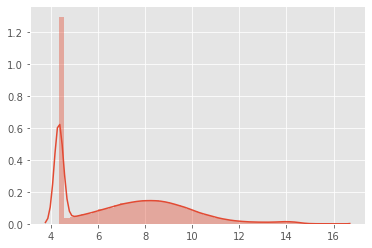

In [49]:
sns.distplot(log_data.drop(columns='cancer').stack())

In [50]:
log_data.drop(columns='cancer').stack().max()

16.12300993758573

In [51]:
log_data.drop(columns='cancer').stack().min()

4.321928094887363

In [52]:
# lets look at a clustermap and PCA

In [53]:
#make color mapping for cancer types. this will visualize the cancer groups in the clustermap.

In [54]:
color_map = dict(zip(set(data.cancer), sns.mpl_palette("Set2", len(set(data.cancer)))))

In [55]:
sns.mpl_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961)]

In [56]:
row_cols = data.cancer.map(color_map)

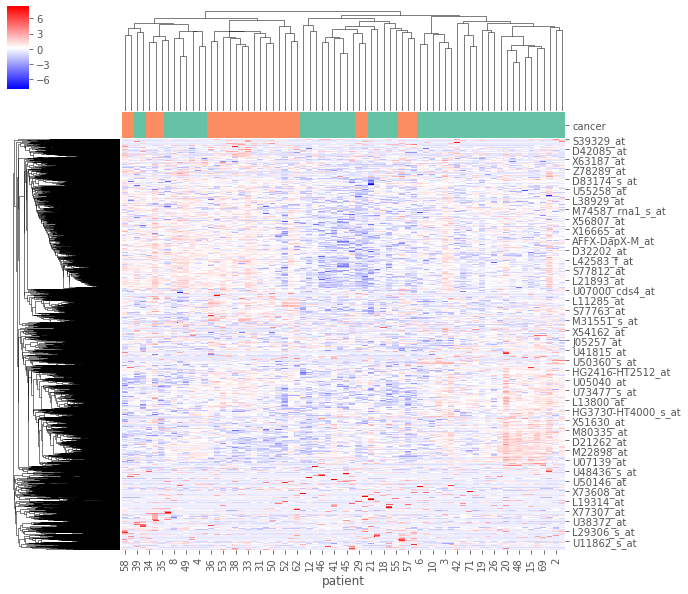

In [57]:
ax = sns.clustermap(log_data.drop(columns='cancer').T, metric='correlation', cmap='bwr',z_score=0, col_colors=row_cols)


In [58]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [59]:
legend_bars = [Patch(facecolor=(0.4, 0.7607843137254902, 0.6470588235294118),label='ALL'),
               Patch(facecolor=(0.9882352941176471, 0.5529411764705883, 0.3843137254901961),label='AML')]

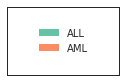

In [60]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(2,1.25))
    fig.legend(handles=legend_bars,loc='center',frameon=False)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    #fig.savefig('C:/Users/natea/figures/legendbars.png', dpi=300)

In [61]:
# now look at grouping by PCA. I'll just look at first 3 pc's.

In [62]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [63]:
pca = PCA(3)

In [64]:
pca_data = log_data.drop('cancer',axis=1)

In [65]:
y = data.cancer

In [66]:
X = pca.fit_transform(pca_data)

In [67]:
X.shape

(72, 3)

In [68]:
y.shape

(72,)

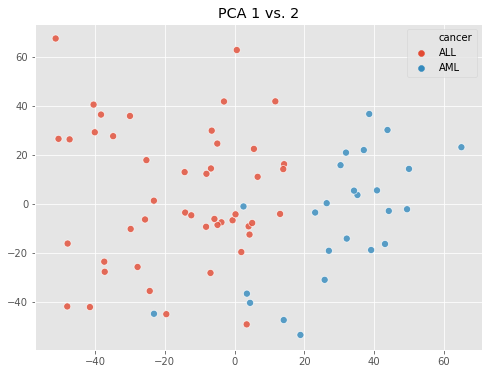

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y,s=50,alpha=.8)
ax.set(title='PCA 1 vs. 2');
#plt.savefig('C:/Users/natea/figures/PCA1v2.png')

In [70]:
cols = np.array(['blue' if i=='ALL' else 'orange' for i in data.cancer])

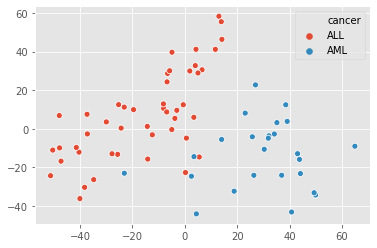

In [71]:
ax = sns.scatterplot(X[:,0], X[:,2], hue=y)

[Text(0.5, 0.92, 'First 3 principal components')]

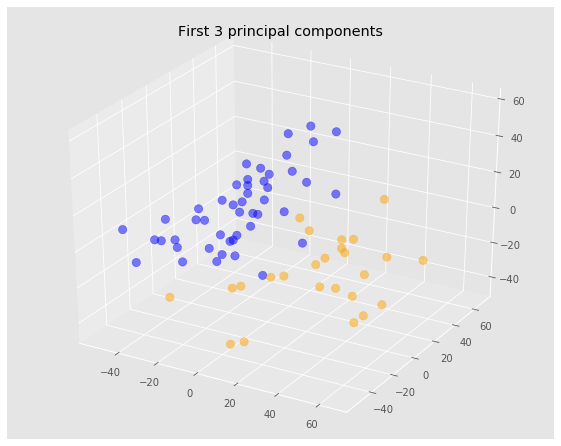

In [72]:
fig, ax = plt.subplots(figsize=(8,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1])
scatter = ax.scatter(X[:,0], X[:,1], X[:,2],c=cols,s=70, alpha=0.5)
ax.set(title='First 3 principal components')
#leg = ax.legend(*scatter.legend_elements(),title='Cancer')
#ax.add_artist(leg)
#plt.savefig('C:/Users/natea/figures/logdata_PCA3d.png')

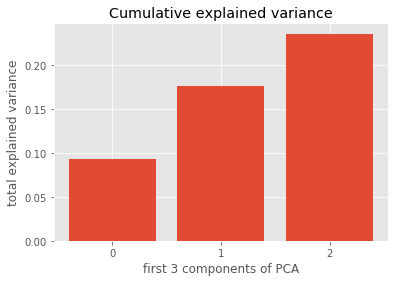

In [73]:
plt.bar([0,1,2],np.cumsum(pca.explained_variance_ratio_))
plt.xticks([0,1,2])
plt.xlabel('first 3 components of PCA')
plt.ylabel('total explained variance')
plt.title('Cumulative explained variance');

In [74]:
from sklearn.manifold import TSNE

In [75]:
X_embed = TSNE().fit_transform(log_data.drop('cancer',axis=1))

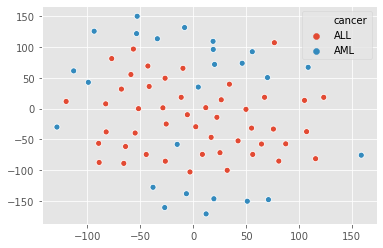

In [76]:
sns.scatterplot(x=X_embed[:,0], y=X_embed[:,1], hue=y)

In [77]:
import umap

In [78]:
umap.__version__

'0.3.10'

In [79]:
reducer = umap.UMAP()

In [80]:
umap_embed = reducer.fit_transform(log_data.drop('cancer',axis=1))

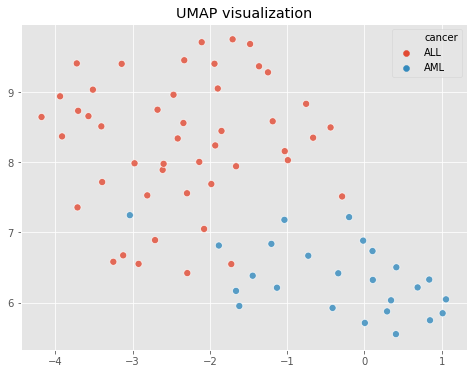

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.scatterplot(x=umap_embed[:,0], y=umap_embed[:,1], hue=y, s=50, alpha=.8)
plt.title("UMAP visualization");
plt.savefig('C:/Users/natea/figures/logdata_AML_UMAP.png')

In [82]:
os.chdir('C:/Users/natea/PycharmProjects')
from data_tools import Volcano

In [83]:
Volcano.get_groups(data, 'cancer')

['ALL', 'AML']

In [84]:
aml = log_data[log_data.cancer == 'AML'].drop(columns='cancer')
_all = log_data[log_data.cancer == 'ALL'].drop(columns='cancer')

In [85]:
from scipy.stats import ttest_ind

In [86]:
aml.dtypes

AFFX-BioB-5_at     float64
AFFX-BioB-3_at     float64
AFFX-BioC-5_at     float64
AFFX-BioC-3_at     float64
AFFX-BioDn-3_at    float64
                    ...   
X83863_at          float64
Z17240_at          float64
L49218_f_at        float64
M71243_f_at        float64
Z78285_f_at        float64
Length: 6833, dtype: object

In [87]:
ttest_ind(aml, _all)[1]

array([0.4416289 , 0.73335428, 0.09861277, ..., 0.02198333, 0.00115974,
       0.25358594])

In [88]:
probe_list = [col for col in log_data.columns if 'cancer' not in col]

In [89]:
fold_change_dict = {}
ttest_dict = {}
group1 = _all
group2 = aml

In [90]:
for gene in probe_list:
    baseline = group1[gene]
    test = group2[gene]
    fold_change_dict[gene] = test.mean() - baseline.mean()
    p_val = ttest_ind(baseline, test)[1] 
    log_pval = -np.log10(p_val)
    ttest_dict[gene] = log_pval
    volcano_df = pd.DataFrame.from_dict(fold_change_dict, orient="Index")
    volcano_df.columns = ['fold_change']
    #volcano_df['pval'] = np.fromiter(ttest_dict.values(),dtype=float)
    #volcano_df['pval'] = volcano_df['gene'].map(ttest_dict)
    #volcano_df.reset_index(inplace=True)

In [91]:
volcano_df['pval'] = volcano_df.index.map(ttest_dict)

In [92]:
volcano_df.head()

,fold_change,pval
AFFX-BioB-5_at,-0.047699,0.354943
AFFX-BioB-3_at,-0.103257,0.134686
AFFX-BioC-5_at,0.502779,1.006067
AFFX-BioC-3_at,-0.053425,0.328168
AFFX-BioDn-3_at,-0.527472,0.712768


In [93]:
volcano_df.fold_change.max()

6.56108913055374

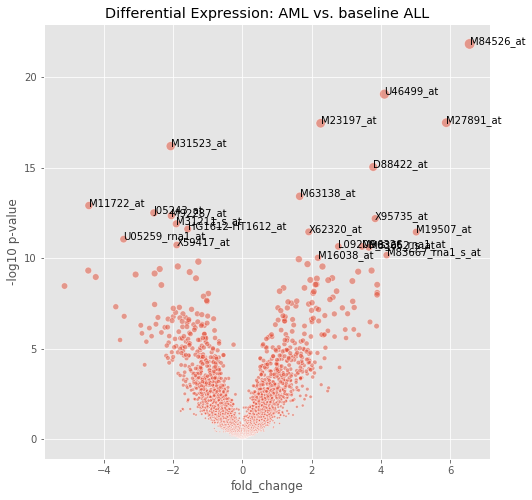

In [94]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.scatterplot(x="fold_change", y="pval", data= volcano_df.astype('float'), s=volcano_df['pval']*5,alpha=.5)
ax.set(title='Differential Expression: AML vs. baseline ALL', ylabel='-log10 p-value')
for i,row in volcano_df.iterrows():
    if row['pval'] > -np.log10(.0000000001):
        ax.text(row['fold_change'],row['pval'],str(i))
#ax.set(title="DE genes: {} vs. baseline {}".format(treatment_group,baseline_group), xlabel="log2 fold-change", ylabel="-log p-value")
plt.savefig('C:/Users/natea/figures/logdata_volcano.png')

In [95]:
#Volcano.make_volcano(log_data, probe_list,'cancer','AML','ALL',label_alpha=.0001)

In [96]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [102]:
X = log_data.drop(columns='cancer').values

In [103]:
y = log_data.cancer.values

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12)

In [109]:
acc_scores = []
for k in range(1, 21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))

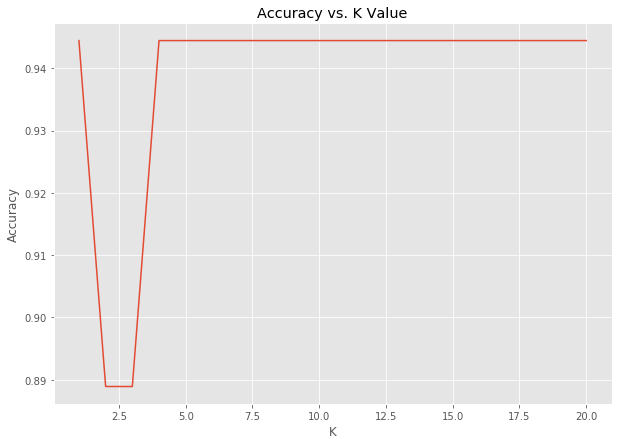

In [120]:
plt.figure(figsize=(10, 7))
plt.plot(range(1,21),acc_scores)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy');

In [112]:
# with k=4, we get maximum accuracy rate.

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [114]:
rfc = RandomForestClassifier(random_state=12)

In [115]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [116]:
rfc_pred = rfc.predict(X_test)

In [117]:
print('RandomForest accuracy is {:0.2f}'.format(accuracy_score(y_test, rfc_pred)))

RandomForest accuracy is 0.94


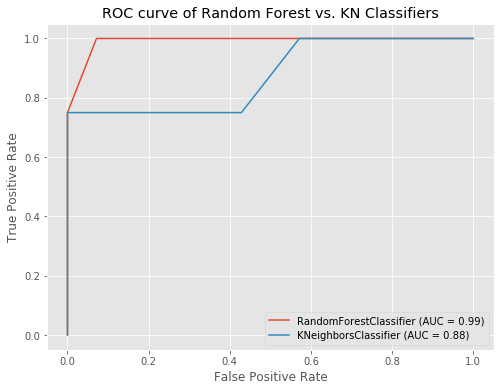

In [118]:
fig, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(rfc, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
ax.set(title='ROC curve of Random Forest vs. KN Classifiers');